In [2]:
import numpy as np
import xarray as xr
from dask.distributed import Client
from xcube.util.dask import compute_array_from_func, ChunkContext
client = None

In [3]:
if client:
    client.close()
client = Client(processes=True)

In [11]:
def my_func(context: ChunkContext):
    csy, csx = context.chunk_slices
    ch, cw = context.chunk_shape
    _, w = context.array_shape
    a = np.ndarray((ch, cw), dtype=context.dtype)
    for j in range(ch):
        for i in range(cw):
            a[j, i] = 0.1 * ((csy.start + j) * w + csx.start + i)
    return a

In [12]:
a = compute_array_from_func(my_func, (1024, 2048), (256, 512), np.float64)

In [13]:
a

dask.array<from_func, shape=(1024, 2048), dtype=float64, chunksize=(256, 512), chunktype=numpy.ndarray>

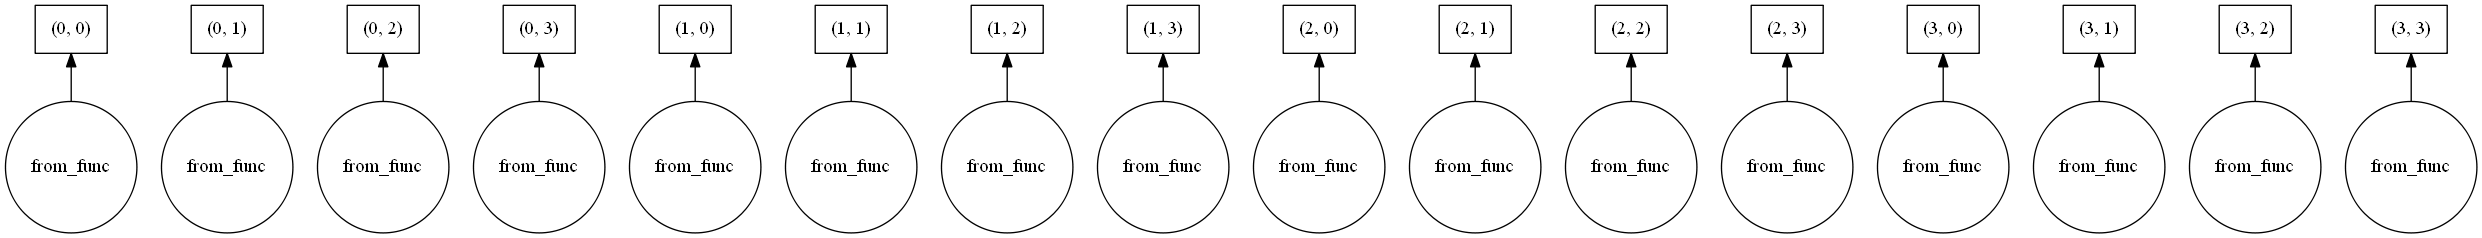

In [14]:
a.visualize()

In [15]:
np.array(a)

array([[0.000000e+00, 1.000000e-01, 2.000000e-01, ..., 2.045000e+02,
        2.046000e+02, 2.047000e+02],
       [2.048000e+02, 2.049000e+02, 2.050000e+02, ..., 4.093000e+02,
        4.094000e+02, 4.095000e+02],
       [4.096000e+02, 4.097000e+02, 4.098000e+02, ..., 6.141000e+02,
        6.142000e+02, 6.143000e+02],
       ...,
       [2.091008e+05, 2.091009e+05, 2.091010e+05, ..., 2.093053e+05,
        2.093054e+05, 2.093055e+05],
       [2.093056e+05, 2.093057e+05, 2.093058e+05, ..., 2.095101e+05,
        2.095102e+05, 2.095103e+05],
       [2.095104e+05, 2.095105e+05, 2.095106e+05, ..., 2.097149e+05,
        2.097150e+05, 2.097151e+05]])

In [17]:
da = xr.DataArray(a, dims=('y', 'x'))

In [18]:
da

<xarray.DataArray 'from_func-2076c9028a13fdd32a49d073c782507b' (y: 1024, x: 2048)>
dask.array<from_func, shape=(1024, 2048), dtype=float64, chunksize=(256, 512), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [20]:
da.values

array([[0.000000e+00, 1.000000e-01, 2.000000e-01, ..., 2.045000e+02,
        2.046000e+02, 2.047000e+02],
       [2.048000e+02, 2.049000e+02, 2.050000e+02, ..., 4.093000e+02,
        4.094000e+02, 4.095000e+02],
       [4.096000e+02, 4.097000e+02, 4.098000e+02, ..., 6.141000e+02,
        6.142000e+02, 6.143000e+02],
       ...,
       [2.091008e+05, 2.091009e+05, 2.091010e+05, ..., 2.093053e+05,
        2.093054e+05, 2.093055e+05],
       [2.093056e+05, 2.093057e+05, 2.093058e+05, ..., 2.095101e+05,
        2.095102e+05, 2.095103e+05],
       [2.095104e+05, 2.095105e+05, 2.095106e+05, ..., 2.097149e+05,
        2.097150e+05, 2.097151e+05]])

In [21]:
ds = xr.Dataset({'test': da})

In [22]:
ds.test

<xarray.DataArray 'test' (y: 1024, x: 2048)>
dask.array<from_func, shape=(1024, 2048), dtype=float64, chunksize=(256, 512), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [23]:
ds.test.values

array([[0.000000e+00, 1.000000e-01, 2.000000e-01, ..., 2.045000e+02,
        2.046000e+02, 2.047000e+02],
       [2.048000e+02, 2.049000e+02, 2.050000e+02, ..., 4.093000e+02,
        4.094000e+02, 4.095000e+02],
       [4.096000e+02, 4.097000e+02, 4.098000e+02, ..., 6.141000e+02,
        6.142000e+02, 6.143000e+02],
       ...,
       [2.091008e+05, 2.091009e+05, 2.091010e+05, ..., 2.093053e+05,
        2.093054e+05, 2.093055e+05],
       [2.093056e+05, 2.093057e+05, 2.093058e+05, ..., 2.095101e+05,
        2.095102e+05, 2.095103e+05],
       [2.095104e+05, 2.095105e+05, 2.095106e+05, ..., 2.097149e+05,
        2.097150e+05, 2.097151e+05]])

In [16]:
client.close()